In [18]:
import pandas as pd
import numpy as np
import scipy.stats as st
wiederstaende = pd.read_csv(r"widerstaende.txt",sep=" ", header=0)
wiederstaende.head()

,Methode A,Methode B
0,98.574391,99.794713
1,101.207987,99.032684
2,98.017907,99.696307
3,99.360374,100.840861
4,100.301177,100.174309


In [23]:
differenzen = wiederstaende["Methode A"] - wiederstaende["Methode B"]
print(differenzen.mean())
print(differenzen.var())
print(differenzen.std())

-0.9502568696222127
1.8898564410608354
1.3747204956138668


In [25]:
st.t.interval(df = 29, loc=0, scale=differenzen.std()/np.sqrt(30), alpha=0.95)

(-0.5133290693893544, 0.5133290693893544)

In [26]:
st.t.interval(df = 29, loc=0, scale=differenzen.std()/np.sqrt(30), alpha=0.95)

(-0.5133290693893544, 0.5133290693893544)

In [27]:
0.2203/np.sqrt(20)/15.2

0.0032408274700210767

In [28]:
norm.cdf()

NameError: name 'norm' is not defined

In [43]:
1-st.norm.cdf(x=115, loc=100, scale=36.6)

0.3409631039341816

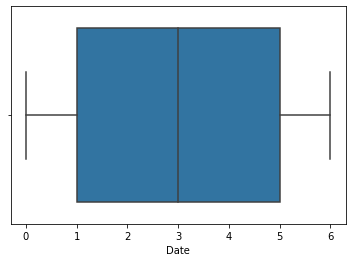

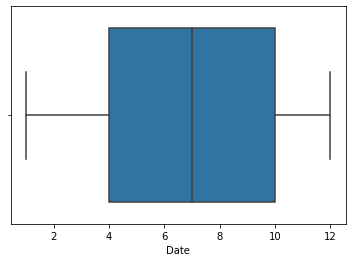

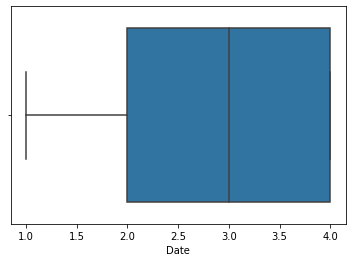

In [86]:


import matplotlib.pyplot as plt
import seaborn as sns
rain = pd.read_csv(r"rainDay.txt",sep=" ", header=None)
rain.columns = ["id","Date", "rain"]
rain["Date"] = pd.to_datetime(rain["Date"], format="%d.%m.%Y", errors='ignore')
rain.set_index(rain["Date"], inplace=True)
sns.boxplot(rain.index.weekday, data=rain)
plt.show()
sns.boxplot(rain.index.month, data=rain)
plt.show()
sns.boxplot(rain.index.quarter, data=rain)
plt.show()

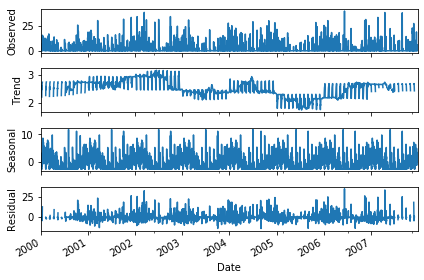

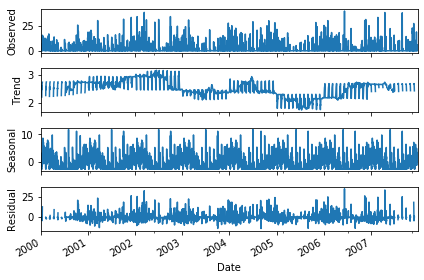

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.seasonal import seasonal_decompose
rain = pd.read_csv('rainDay.txt', sep=' ', header=None)
rain["Date"] = pd.DatetimeIndex(rain[1])
rain.set_index("Date", inplace=True)
# Wir wollen den Wert null vermeiden
rain["rain"] = rain[2] + 0.0000001
rain_ts = DataFrame(rain["rain"])
seasonal_decompose(rain_ts, model="multiplicative", freq=365).plot()

seasonal_decompose(rain_ts, model="additive", freq=365).plot()

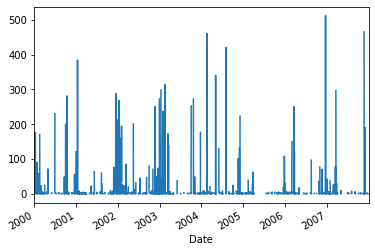

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
rain = pd.read_csv('rainDay.txt', sep=' ', header=None)
rain["Date"] = pd.DatetimeIndex(rain[1])
rain.set_index("Date", inplace=True)
diff = rain[2] / rain[2].shift(1)
diff.plot()

In [108]:
acf(rain[2])[1]

C:\Users\flori\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


0.2371160254476778

In [114]:
pd.Series([1, 3, 4, 5, 6, 10, 23, 46]).quantile(0.2)

3.4000000000000004

C:\Users\flori\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.00000000e+00,  2.20298435e-02,  1.60669815e-02, -2.84411730e-02,
        2.34646245e-02,  3.86022597e-03,  1.11092020e-02,  1.76187775e-02,
        2.15267068e-02, -3.10443586e-02,  3.79438589e-02, -1.11742043e-02,
        2.08374924e-02, -2.03004508e-02, -2.68034327e-02,  8.44361652e-02,
        1.76436067e-03,  3.12540797e-02,  2.91957460e-02, -6.80479337e-03,
        7.18854209e-05,  1.10404838e-02, -9.83759699e-03,  5.01811117e-02,
       -4.20200309e-02,  3.77569407e-02,  1.41669365e-02,  3.45279884e-02,
       -5.61963518e-03, -3.51901993e-02, -1.02631062e-02, -1.76131715e-02,
        2.64378006e-03,  3.96782019e-02, -3.15527005e-03, -4.26835910e-03,
        9.80974927e-03, -2.65771975e-02, -7.84269620e-03,  1.58652396e-03,
        1.31382385e-02])

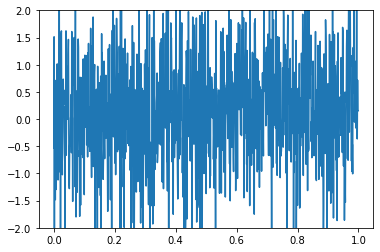

In [116]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 1, 1000, endpoint=False)
noise = np.random.normal(size=1000)
signal = 0.5*t
plt.plot(t, signal + noise)
plt.ylim(-2, 2)
acf(signal + noise)